# Fluxonium single-qubit gate

## Import

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings

## Two-level system tutorial

Text(0, 0.5, '$\\mathrm{P_0}$')

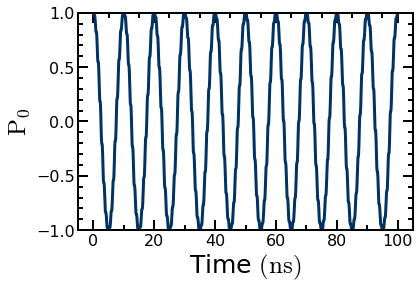

In [175]:
atom_freq = 5e9 #GHz
drive_freq = 5e9 #GHz
coupl_const = 0.1e9 #GHz
H0 = 0.5*atom_freq*sigmaz()
H1 = 2*np.pi*coupl_const*sigmax()
    
# def H1_coeff(time,wd):
#     return np.cos(2*np.pi*wd*time)

tlist = np.linspace(0,100,2001)*1e-9
H = [H0,[H1, np.cos(drive_freq*tlist)]]
output = mesolve(H, rho0=basis(2,0), tlist=tlist, c_ops=[], e_ops=sigmaz())
sz = output.expect[0]
plt.plot(tlist*1e9, sz)
# U_t = propagator(H, tlist,[])
plt.ylim([-1,1])
plt.xlabel(r'Time $\mathrm{(ns)}$')
plt.ylabel(r'$\mathrm{P_0}$')

Text(0, 0.5, '$\\mathrm{P_0}$')

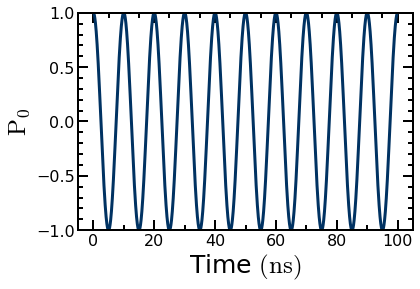

In [176]:
#RWA
H = 0.5*(atom_freq-drive_freq)*sigmaz() + 0.5*2*np.pi*coupl_const*sigmax()
output = mesolve(H, rho0=basis(2,0),tlist = tlist, c_ops=[], e_ops=sigmaz())
sz = output.expect[0]
plt.plot(tlist*1e9,sz)
plt.ylim([-1,1])
plt.xlabel(r'Time $\mathrm{(ns)}$')
plt.ylabel(r'$\mathrm{P_0}$')